In [92]:
setwd('/import/DB/fel/BJTC-204')

In [ ]:
load('/import/mdd.rna/GSE80655.rda')

ls()

head(expr3,2)

dim(expr3)

library(dplyr)

cliinfo = cliinfo %>%  filter(V4 == 'M')

dim(cliinfo)

head(cliinfo,2)

In [ ]:
library(dplyr)

count =expr3 %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')

table(cliinfo$V3)

count = count[,cliinfo$V1]

In [105]:
prot = c('H4C3','PRSS3','TUSC3')

In [106]:
count = count[unique(prot),]

In [107]:
count = na.omit(count)

In [108]:
dim(count)

[1]  3 38

In [109]:
head(count,2)

,SL32231,SL32242,SL32243,SL32244,SL32245,SL32247,SL32248,SL32249,SL5886,SL5997,...,SL7155,SL7381,SL7383,SL7384,SL7614,SL7698,SL7801,SL7804,SL7806,SL7807
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
H4C3,7,13,20,9,27,6,16,9,6,27,...,83,131,107,112,146,50,46,305,200,134
PRSS3,317,450,286,411,488,335,307,399,112,239,...,737,696,492,530,592,508,164,534,648,451


In [110]:
count = log2(edgeR::cpm(count) +1)

In [111]:
group_list = factor(cliinfo$V3,levels = c("Control","MD"))

In [112]:
library(edgeR)

In [113]:
expr = count %>%  t() %>%  as.data.frame() %>% tibble::rownames_to_column(.,'V1')

In [114]:
data = cbind(cliinfo,expr)

In [115]:
data$Group = ifelse(data$V3 == 'MD',1,0)

In [116]:
head(data,4)

,V1,V2,V3,V4,V5,V6,V1,H4C3,PRSS3,TUSC3,Group
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SL32231,46,MD,M,X3064,DLPFC,SL32231,11.94163,17.44225,19.64170,1
2,SL32242,32,Control,M,X3186,DLPFC,SL32242,12.55677,17.66988,19.58316,0
3,SL32243,44,Control,M,X3196,DLPFC,SL32243,13.83048,17.66833,19.56780,0
4,SL32244,35,Control,M,X3275,DLPFC,SL32244,12.17107,17.68383,19.58203,0


In [117]:
fold_pre <- glm(Group~PRSS3+TUSC3,data=data,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=data)

options(repr.plot.width = 6)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



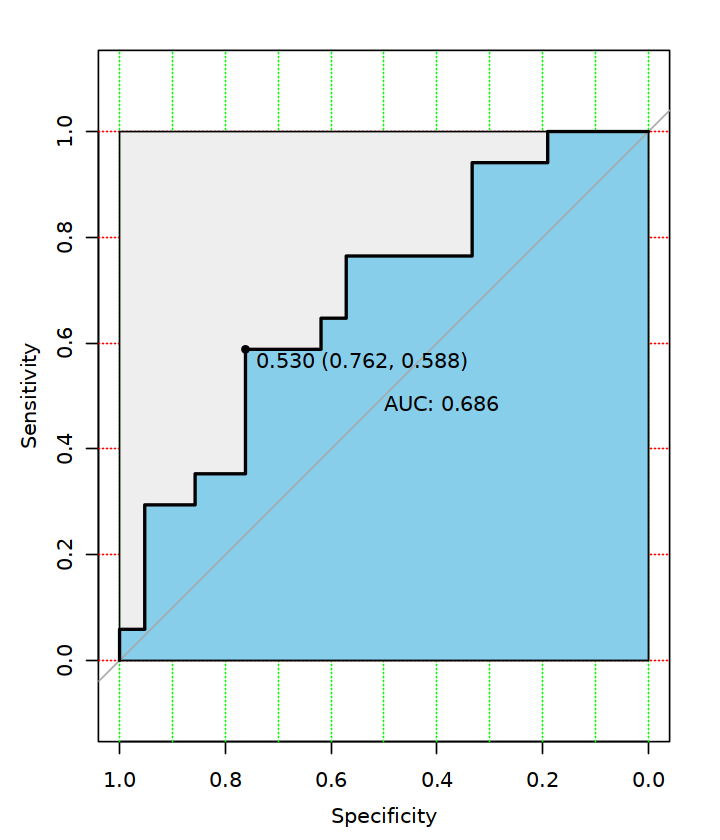

In [118]:
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [132]:
head(data,2)

,V1,V2,V3,V4,V5,V6,V1,H4C3,PRSS3,TUSC3,Group
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,SL32231,46,MD,M,X3064,DLPFC,SL32231,11.94163,17.44225,19.64170,1
2,SL32242,32,Control,M,X3186,DLPFC,SL32242,12.55677,17.66988,19.58316,0


In [133]:
fold_pre <- glm(Group~H4C3+TUSC3+PRSS3,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [134]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [138]:
pdf('./figure/fig7.testset1.roc.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$H4C3,percent=TRUE, levels=c(1,0),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$PRSS3,percent=TRUE, levels=c(1,0),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$TUSC3,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
legend("topleft", legend=c(paste0("H4C3 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("PRSS3 ", round(rocobj2$auc/100,digits = 2)),
                               paste0("TUSC3 ", round(rocobj3$auc/100,digits = 2)),
                               paste0("model_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70"), lwd=1)
dev.off()

png 
  2

In [121]:
load('/import/mdd.rna/GSE80655.rda')
ls()
head(expr3,2)
dim(expr3)
library(dplyr)
cliinfo = cliinfo %>%  filter(V4 == 'M')
dim(cliinfo)
head(cliinfo,2)

[1] "cliinfo"      "count"        "data"         "expr"         "expr3"       
 [6] "fold_pre"     "fold_predict" "group_list"   "prot"         "roc_curve"

,SYMBOL,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TSPAN6,76,130,104,147,123,129,150,165,104,...,203,241,301,416,238,198,72,216,335,105
2,TNMD,3,2,3,2,0,4,4,5,3,...,5,5,8,1,4,5,1,3,9,4


[1] 34036    48

[1] 38  6

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32231,46,MD,M,X3064,DLPFC
2,SL32242,32,Control,M,X3186,DLPFC


In [122]:
library(dplyr)
count =expr3 %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'SYMBOL')
table(cliinfo$V3)
count = count[,cliinfo$V1]


Control      MD 
     21      17 

In [123]:
head(count,2)

,SL32231,SL32242,SL32243,SL32244,SL32245,SL32247,SL32248,SL32249,SL5886,SL5997,...,SL7155,SL7381,SL7383,SL7384,SL7614,SL7698,SL7801,SL7804,SL7806,SL7807
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,130,104,147,123,129,165,104,133,61,163,...,192,315,220,302,301,198,72,216,335,105
TNMD,2,3,2,0,4,5,3,4,0,1,...,5,7,3,7,8,5,1,3,9,4


In [124]:
head(cliinfo,2)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32231,46,MD,M,X3064,DLPFC
2,SL32242,32,Control,M,X3186,DLPFC


In [125]:
group_list = factor(cliinfo$V3,levels = c("Control","MD"))

In [126]:
exp = count

In [127]:
library(limma)

design <- model.matrix(~0+group_list)
colnames(design)=levels(group_list)
rownames(design)=colnames(exp)

dge <- DGEList(counts=count)
dge <- calcNormFactors(dge)

v <- voom(dge,design, normalize="quantile")
fit <- lmFit(v, design)

constrasts = paste(rev(levels(group_list)),collapse = "-")
cont.matrix <- makeContrasts(contrasts=constrasts,levels = design) 
fit2=contrasts.fit(fit,cont.matrix)
fit2=eBayes(fit2)

DEG = topTable(fit2, coef=constrasts, n=Inf)
DEG = na.omit(DEG)

foldChange=0.25
padj=0.05

diff2=DEG
diff2$group = as.factor(ifelse(diff2$P.Value < padj & abs(diff2$logFC) >= foldChange, 
                             ifelse(diff2$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff2$group)


     Down NoSignifi        Up 
      734     32602       700 

In [128]:
diff2[c('H4C3','PRSS3','TUSC3'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
H4C3,-0.2505420,0.3679244,-0.6897707,0.49447186,0.9541493,-4.773152,NoSignifi
PRSS3,0.0392564,3.3128650,0.3339535,0.74022539,0.9652253,-5.067559,NoSignifi
TUSC3,0.1259352,5.5744650,1.8600619,0.07052259,0.8684808,-4.022702,NoSignifi


### edgeR

In [ ]:
# rownames(cliinfo) = cliinfo[,1]

# con.sample = cliinfo %>%  dplyr::filter(V3 =='Control') %>% rownames()
# mdd.sample = cliinfo %>%  dplyr::filter(V3 =='MD') %>% rownames()



# control = count[,con.sample]
# MDD = count[,mdd.sample]

# exp <- cbind(control, MDD)

# group=c(rep("control",dim(control)[2]),rep("MDD",dim(MDD)[2])) 

# library("edgeR")  
# library(dplyr)
# library(ggrepel)
# library(ggplot2)
# library(cowplot)

# dimnames=list(rownames(exp),colnames(exp))
# data=matrix(as.numeric(as.matrix(exp)),nrow=nrow(exp),dimnames=dimnames)
# data=avereps(data)
# data=data[rowMeans(data)>1,]
# design <- model.matrix(~group)
# y <- DGEList(counts=data,group=group)
# y <- calcNormFactors(y)
# y <- estimateCommonDisp(y)
# y <- estimateTagwiseDisp(y)
# et <- exactTest(y,pair = c("control","MDD"))
# topTags(et)

# foldChange=0
# padj=0.05

# ordered_tags <- topTags(et, n=100000)
# allDiff=ordered_tags$table
# allDiff=allDiff[is.na(allDiff$FDR)==FALSE,]
# diff=allDiff
# diff$group = as.factor(ifelse(diff$PValue < padj & abs(diff$logFC) >= foldChange, 
#                              ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
# table(diff$group)

In [130]:
diff2['EDNRB',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
EDNRB,-0.6720514,3.792457,-2.462397,0.0174158,0.9940441,-3.270598,Down


In [131]:
load('dada.rda')

In [73]:
egderup = diff %>%  filter(group == 'Up')%>% rownames()
edgerdown = diff %>%  filter(group == 'Down')%>% rownames()

In [132]:
bulk1limmaup = diff2 %>%  filter(group == 'Up')%>% rownames()
bulk1limmadown = diff2 %>%  filter(group == 'Down')%>% rownames()

In [77]:
#bulk1up = intersect(egderup,limmaup)

In [ ]:
bulk1down = intersect(edgerdown,limmadown)

In [129]:
intersect(allup,bulk1up)

ERROR: Error in intersect(allup, bulk1up): object 'allup' not found


In [ ]:
intersect(alldown,bulk1down)

In [133]:
intersect(limma_up,bulk1limmaup)

[1] "ANGEL2"  "SLC47A2" "TNMD"    "MFSD11"  "HSD17B2" "COX19"   "SNTG2"  
 [8] "WDR72"   "TEF"     "KRBOX4"  "RNF130"  "CNOT11"

In [134]:
intersect(limma_down,bulk1limmadown)

[1] "SLC13A5"  "PLA2G5"   "TRIB1"    "KCNJ16"   "PLA2G3"   "OLFM2"   
 [7] "FAT1"     "RRAD"     "ARSF"     "ALDH1A1"  "PDLIM3"   "TXNDC2"  
[13] "RLBP1"    "ACKR3"    "NT5E"     "S1PR1"    "PLEKHO2"  "ITM2C"   
[19] "PYGM"     "EDNRB"    "PPP1R3C"  "MRO"      "EPHX2"    "MMD2"    
[25] "HSD17B6"  "GLUL"     "PRF1"     "ITGB5"    "ACSBG1"   "PPP1R3G" 
[31] "SLCO1C1"  "SLC25A33" "EZR"

In [136]:
ene = c(intersect(limma_up,bulk1limmaup),intersect(limma_down,bulk1limmadown))

In [ ]:
save(ene,count,cliinfo,file = 'ene.rda')

In [ ]:
ene

In [ ]:
intersect(limma_up,bulk1limmaup)

In [137]:
ene

[1] "ANGEL2"   "SLC47A2"  "TNMD"     "MFSD11"   "HSD17B2"  "COX19"   
 [7] "SNTG2"    "WDR72"    "TEF"      "KRBOX4"   "RNF130"   "CNOT11"  
[13] "SLC13A5"  "PLA2G5"   "TRIB1"    "KCNJ16"   "PLA2G3"   "OLFM2"   
[19] "FAT1"     "RRAD"     "ARSF"     "ALDH1A1"  "PDLIM3"   "TXNDC2"  
[25] "RLBP1"    "ACKR3"    "NT5E"     "S1PR1"    "PLEKHO2"  "ITM2C"   
[31] "PYGM"     "EDNRB"    "PPP1R3C"  "MRO"      "EPHX2"    "MMD2"    
[37] "HSD17B6"  "GLUL"     "PRF1"     "ITGB5"    "ACSBG1"   "PPP1R3G" 
[43] "SLCO1C1"  "SLC25A33" "EZR"

In [138]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [139]:
gene_symbol <- bitr(geneID = ene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:many mapping between keys and columns



In [154]:
options(repr.plot.height = 6,repr.plot.widht = 8.7)

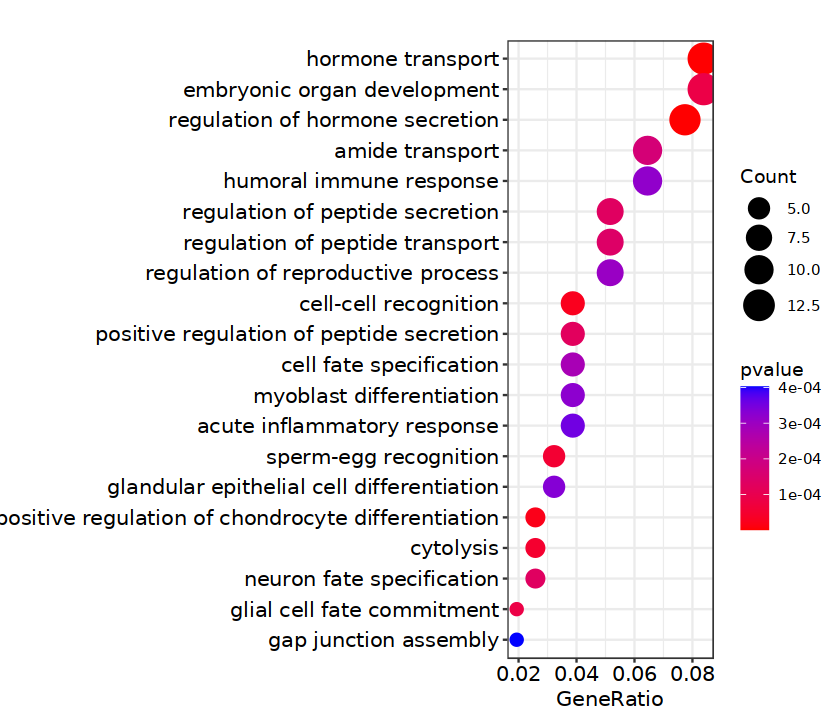

In [155]:
dotplot(BP_res,showCategory=20,color = "pvalue",label_format = 100)

In [166]:
gene_symbol <- bitr(geneID = ene,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")

'select()' returned 1:many mapping between keys and columns



In [167]:
gene = gene_symbol$ENTREZID

In [168]:
kk <- enrichKEGG(gene = gene,keyType = "kegg",organism= "human", qvalueCutoff = 0.05, pvalueCutoff=0.05)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



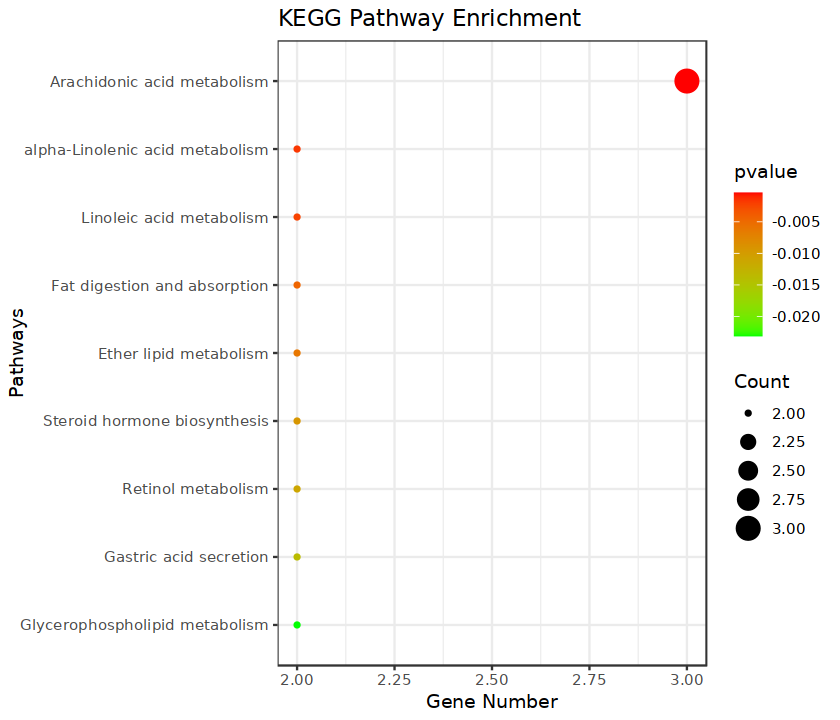

In [169]:
hh <- as.data.frame(kk@result[1:9,])
rownames(hh) <- 1:nrow(hh)
hh$order=factor(rev(as.integer(rownames(hh))),labels = rev(hh$Description))
ggplot(hh,aes(y=order,x=Count))+
geom_point(aes(size=Count,color=-1*pvalue))+# 修改点的大小
scale_color_gradient(low="green",high = "red")+
labs(color=expression(pvalue,size="Count"), 
     x="Gene Number",y="Pathways",title="KEGG Pathway Enrichment")+
theme_bw()

### limma

In [78]:
diff3 = diff2
foldChange=0.5
padj=0.05


In [79]:
diff3$group = as.factor(ifelse(diff3$P.Value < padj & abs(diff3$logFC) >= foldChange, 
                             ifelse(diff3$logFC> foldChange ,'Up','Down'),'NoSignifi'))
table(diff3$group)


     Down NoSignifi        Up 
       98     17467        76 

In [162]:
res = na.omit(diff3)

In [163]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

In [164]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




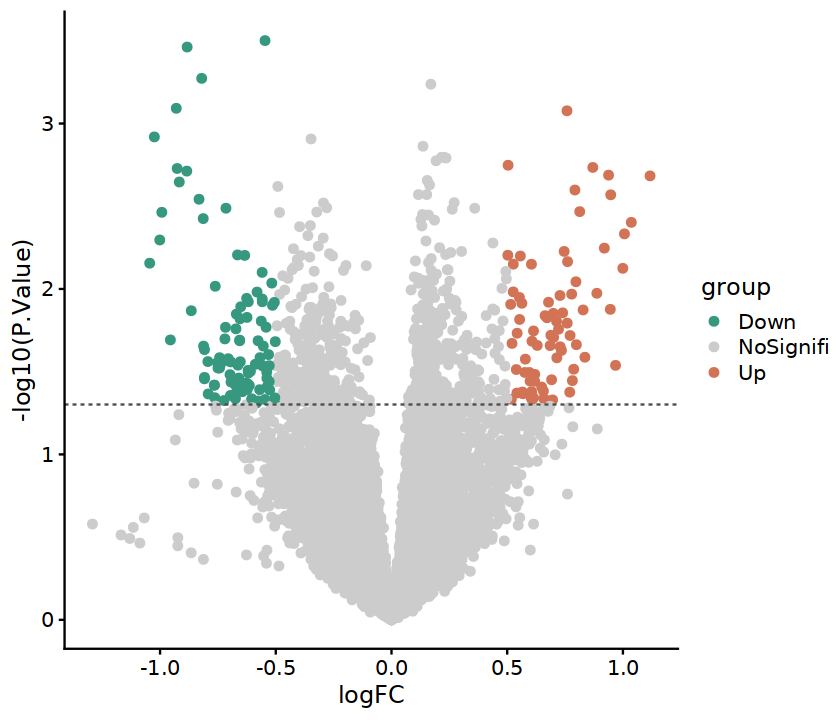

In [165]:
 ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

In [80]:
library(dplyr)

In [81]:
diff1 = diff3 %>%  filter(group != 'NoSignifi')

In [83]:
jiaoji = diff3 %>%  dplyr::filter(group != 'NoSignifi') %>%  rownames()

In [84]:
length(jiaoji)

[1] 174

In [85]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"0.57% of input gene IDs are fail to map..."


In [ ]:
BP_res = simplify(BP)

In [29]:
options(repr.plot.height = 6,repr.plot.width = 8)

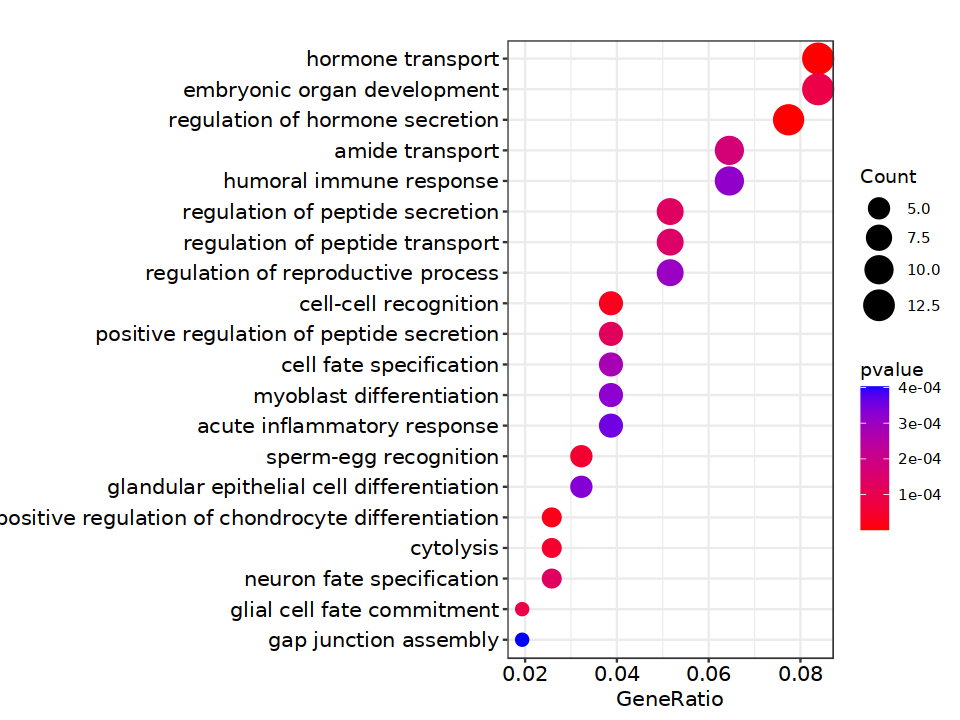

In [43]:
dotplot(BP_res,showCategory=20,color = "pvalue",label_format = 100)

In [36]:
id = BP_res@result$ID

In [37]:
save(id,file = 'enrichgo.rda')

In [45]:
BP_res@result['GO:0002526',]

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0002526,GO:0002526,acute inflammatory response,6/155,114/18903,0.0003550716,0.03254823,0.0282936,HPR/EDNRB/IL31RA/TNF/ORM1/FFAR3,6


### pca

In [157]:
expr = count %>% tibble::rownames_to_column(.,'Gene')

hg_len = 'All_hg19gene_len.txt'

len = read.table(hg_len,header =T,sep = '\t')
library(tidyverse)
library(dplyr)
merge<-left_join(expr,len,by="Gene")
merge <- na.omit(merge)#删除错误值行​
rownames(merge)<-merge[,1]


merge<-merge[,-1]
head(merge)#最后一列Length是基因长度​
kb <- merge$Length/1000
dim(merge)
countdata <- merge[,1:dim(merge)[2]-1]
rpk <- countdata /kb
tpm <- t(t(rpk)/colSums(rpk) * 1000000)

fpkm <- t(t(rpk)/colSums(countdata) * 10^6)
head(fpkm)

expr = fpkm 

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807,Length
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,76,130,104,147,123,129,150,165,104,133,...,241,301,416,238,198,72,216,335,105,4535
TNMD,3,2,3,2,0,4,4,5,3,4,...,5,8,1,4,5,1,3,9,4,1610
DPM1,431,379,359,268,333,432,440,335,324,419,...,610,508,652,496,446,177,554,506,299,1207
SCYL3,177,219,222,169,241,236,185,247,211,279,...,231,368,495,388,316,139,543,556,275,6883
C1orf112,37,40,44,38,31,25,33,42,37,41,...,54,55,109,47,81,27,114,98,46,5967
FGR,120,187,208,202,256,171,270,179,150,187,...,191,232,335,276,236,105,236,437,134,3474


[1] 17593    48

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
TSPAN6,0.58212700,1.1090800,0.7174985,1.30327891,0.8641940,1.05742769,1.11500779,1.3337105,0.85432657,0.95880247,...,1.38675443,1.58483059,1.6887443,1.83814342,1.2580893,1.24113293,1.03808218,1.04785209,1.3116492,0.76712688
TNMD,0.06472571,0.0480619,0.0582989,0.04994608,0.0000000,0.09235754,0.08375255,0.1138411,0.06941658,0.08122485,...,0.09621105,0.09261626,0.1264267,0.01244622,0.0595588,0.08828248,0.04061165,0.04099387,0.0992583,0.08231696
DPM1,12.40370549,12.1486710,9.3057666,8.92739698,8.7906382,13.30499562,12.28879615,10.1740169,10.00012905,11.34910331,...,12.57678469,15.07181862,10.7085616,10.82439620,9.8511338,10.50407919,9.58832012,10.09778270,7.4437783,8.20765536
SCYL3,0.89325806,1.2310145,1.0091139,0.98720253,1.1156365,1.27459583,0.90606195,1.3154493,1.14201695,1.32519940,...,1.24225893,1.00086915,1.3603315,1.44108894,1.3513435,1.30508775,1.32042446,1.73558379,1.4343238,1.32376263
C1orf112,0.21539079,0.2593587,0.2307074,0.25605006,0.1655347,0.15574791,0.18643259,0.2580169,0.23100084,0.22463769,...,0.19729150,0.26988629,0.2345208,0.36604444,0.1888225,0.38588632,0.29585864,0.42031253,0.2916220,0.25542123
FGR,1.19986636,2.0826132,1.8732619,2.33786204,2.3479757,1.82980393,2.61997944,1.8887659,1.60853053,1.75981327,...,2.13132119,1.63963299,1.6991545,1.93231688,1.9045443,1.93113479,1.97622329,1.49453371,2.2335815,1.27799801


In [90]:
group_list

[1] MD      MD      Control Control Control MD      MD      MD      MD     
[10] Control Control MD      MD      Control Control Control Control MD     
[19] Control MD      Control Control Control MD      Control MD      MD     
[28] MD      MD      Control Control MD      MD      Control Control MD     
[37] Control MD      MD      Control Control Control MD      MD      Control
[46] MD      Control
Levels: Control MD

In [87]:
count = expr %>%t() %>%  as.data.frame()
#cg=names(tail(sort(apply(count,1,sd)),3000))
cg = diff1 %>%  rownames()
cg1 = intersect(cg,rownames(expr))
n=expr[cg1,]
#n = cpm(log2(n+1))
pca.res <- prcomp(t(n), scale. = T, center = T)  # 
pca.res
tmp <- as.data.frame(pca.res$x)
head(tmp)
tmp$group <- group_list
head(tmp)
library(ggplot2)
library(ggsci)


Standard deviations (1, .., p=47):
 [1] 5.805220e+00 5.088153e+00 3.394291e+00 2.810359e+00 2.794579e+00
 [6] 2.412688e+00 2.374790e+00 2.195244e+00 2.114249e+00 2.092126e+00
[11] 1.959008e+00 1.927339e+00 1.880418e+00 1.849962e+00 1.738701e+00
[16] 1.705509e+00 1.678242e+00 1.637564e+00 1.577163e+00 1.525197e+00
[21] 1.507522e+00 1.431881e+00 1.387688e+00 1.349768e+00 1.323511e+00
[26] 1.281866e+00 1.257292e+00 1.232240e+00 1.205534e+00 1.191805e+00
[31] 1.133624e+00 1.094957e+00 1.078426e+00 1.043809e+00 9.932925e-01
[36] 9.548030e-01 9.189547e-01 9.131997e-01 8.576411e-01 8.335783e-01
[41] 8.231931e-01 7.543915e-01 7.159753e-01 6.942480e-01 6.716168e-01
[46] 6.524366e-01 2.578036e-15

Rotation (n x k) = (173 x 47):
                     PC1           PC2           PC3          PC4           PC5
USH1C       0.0925672147 -0.0372294188 -0.1059125373  0.131742575 -0.1116066805
PLEKHO2     0.1136279443 -0.1270429624  0.0517529147  0.002019833 -0.0411628568
PYGM        0.1117241305 -0.1274

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SL32230,-3.60903421,4.892216,6.0162730,-1.1396970,0.2915619,-6.2141513,6.62171679,-2.6301971,4.48393554,-4.1546584,...,0.31805178,0.3699488,0.009077015,-0.5912493,-0.2848752,0.3954525,0.41719419,-0.2221271,-0.08020399,-9.082630e-16
SL32231,-0.08035865,4.367614,2.6967420,-1.0822711,-0.8718434,2.3971087,0.21251327,0.6287675,0.04307153,1.0990427,...,0.25569549,-0.2532140,-0.392627238,-1.3933405,-1.5546095,0.7517909,0.55560713,0.7881145,-0.80724305,3.789018e-16
SL32242,4.23303435,5.641434,-1.7084165,2.8742817,0.1150476,0.8076346,0.08358374,-0.4037649,1.06326016,-0.9232180,...,-0.91463209,-1.4809967,-2.211376679,-0.4820353,0.6887103,-0.1366031,-0.97059668,1.6784096,-0.86046340,-1.790838e-16
SL32243,10.71910391,-1.650971,-3.5205685,6.6711585,-1.3906421,0.1433124,-1.09385448,-4.4047994,4.92842698,-0.5618162,...,0.73796868,0.8407846,-0.427805154,-0.4017845,0.2097519,0.4940271,-0.02884035,-1.1277593,-0.08309445,2.525946e-16
SL32244,2.58393196,7.069837,-0.4728155,-0.5454005,2.1002392,2.7871606,-2.33889027,-2.4776727,3.37546964,-2.5009610,...,-0.44172099,-0.7086230,0.322522493,1.9851046,-1.3176552,-0.4510511,0.12834856,0.8768992,0.96094496,-1.831486e-16
SL32245,-0.11417434,4.800559,-0.3651441,2.2531832,-0.5096927,1.4522804,-0.46153364,1.7813475,-1.56600899,1.3116686,...,-0.02936042,1.4737101,0.011201104,0.4119455,-0.5159642,1.0727365,-0.52275114,0.2019070,-0.35118066,-1.796792e-16


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
SL32230,-3.60903421,4.892216,6.0162730,-1.1396970,0.2915619,-6.2141513,6.62171679,-2.6301971,4.48393554,-4.1546584,...,0.3699488,0.009077015,-0.5912493,-0.2848752,0.3954525,0.41719419,-0.2221271,-0.08020399,-9.082630e-16,MD
SL32231,-0.08035865,4.367614,2.6967420,-1.0822711,-0.8718434,2.3971087,0.21251327,0.6287675,0.04307153,1.0990427,...,-0.2532140,-0.392627238,-1.3933405,-1.5546095,0.7517909,0.55560713,0.7881145,-0.80724305,3.789018e-16,MD
SL32242,4.23303435,5.641434,-1.7084165,2.8742817,0.1150476,0.8076346,0.08358374,-0.4037649,1.06326016,-0.9232180,...,-1.4809967,-2.211376679,-0.4820353,0.6887103,-0.1366031,-0.97059668,1.6784096,-0.86046340,-1.790838e-16,Control
SL32243,10.71910391,-1.650971,-3.5205685,6.6711585,-1.3906421,0.1433124,-1.09385448,-4.4047994,4.92842698,-0.5618162,...,0.8407846,-0.427805154,-0.4017845,0.2097519,0.4940271,-0.02884035,-1.1277593,-0.08309445,2.525946e-16,Control
SL32244,2.58393196,7.069837,-0.4728155,-0.5454005,2.1002392,2.7871606,-2.33889027,-2.4776727,3.37546964,-2.5009610,...,-0.7086230,0.322522493,1.9851046,-1.3176552,-0.4510511,0.12834856,0.8768992,0.96094496,-1.831486e-16,Control
SL32245,-0.11417434,4.800559,-0.3651441,2.2531832,-0.5096927,1.4522804,-0.46153364,1.7813475,-1.56600899,1.3116686,...,1.4737101,0.011201104,0.4119455,-0.5159642,1.0727365,-0.52275114,0.2019070,-0.35118066,-1.796792e-16,MD


Warning message:
"package 'ggsci' was built under R version 4.2.3"


In [88]:
library(ggsci)

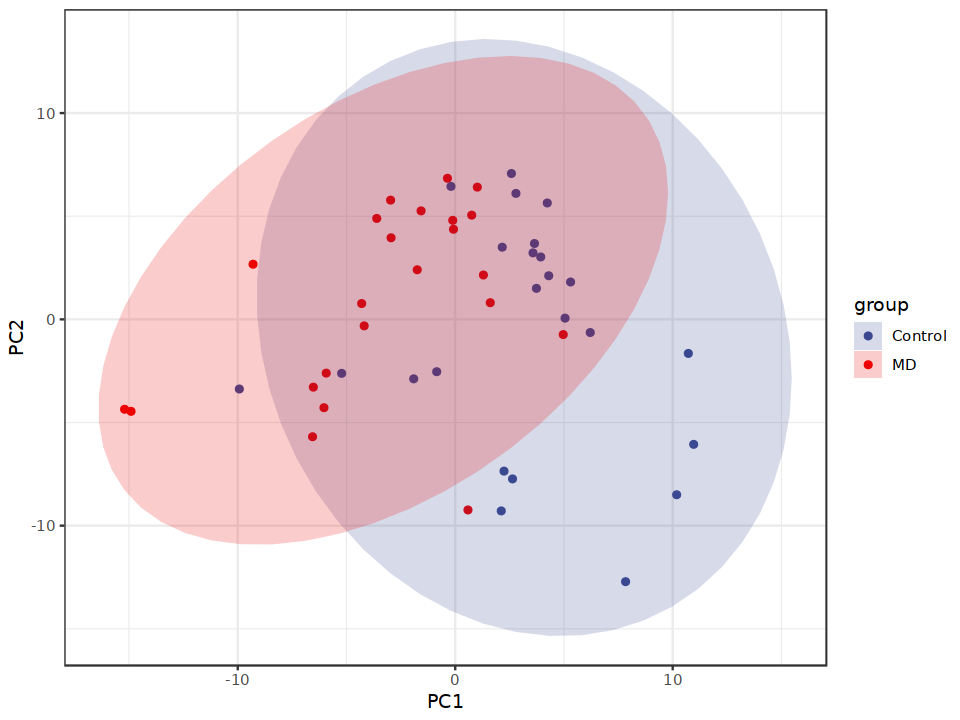

In [89]:
ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()
ggsave('Figure1.pca.pdf',width = 8,height = 8)

In [78]:
save(fpkm,file = 'bulk.fpkm.fpkm.rda')

### 炎症因子

In [119]:
 s = diff2 %>%  filter(group != 'NoSignifi') %>%  rownames()

library(tidyverse)
library(org.Hs.eg.db)
GOID <- c("GO:0002526")
GOgeneID <- get(GOID, org.Hs.egGO2ALLEGS) %>% mget(org.Hs.egSYMBOL) %>% unlist()

gen = data.frame(GOgeneID)

gen1 = gen$GOgeneID

gen2 = intersect(gen1,s)

data1 = log2(fpkm[gen2,]+1)

library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

library(pheatmap)
annotation_col = data.frame(group = group_list)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

[1]  6 47

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
EDNRB,-0.1095635,-0.1452331,-0.5401060,1.1555788,-0.9639088,-0.8608745,-0.5474026,0.4952881,-0.7555651,0.2420611,...,0.7791666,-0.2494668,0.5476772,-0.1644978,0.05715458,-1.2367887,-1.3973386,-0.2695314,0.1249914,-1.494433
FFAR3,-0.7083138,-0.7083138,0.5194163,0.8656965,-0.7083138,-0.7083138,-0.7083138,0.7280805,0.7512326,2.0000000,...,-0.7083138,0.4623984,0.2916587,1.6327627,0.23421688,0.4080319,-0.7083138,1.8579767,-0.7083138,1.868103


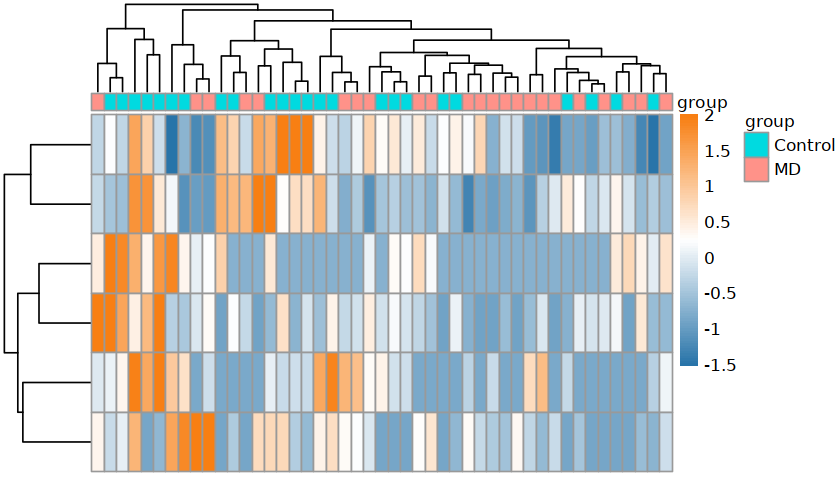

In [120]:
options(repr.plot.width = 7,repr.plot.height = 4)
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [98]:
group_list

[1] MD      MD      Control Control Control MD      MD      MD      MD     
[10] Control Control MD      MD      Control Control Control Control MD     
[19] Control MD      Control Control Control MD      Control MD      MD     
[28] MD      MD      Control Control MD      MD      Control Control MD     
[37] Control MD      MD      Control Control Control MD      MD      Control
[46] MD      Control
Levels: Control MD

In [121]:
gen2

[1] "EDNRB"  "FFAR3"  "HPR"    "ORM1"   "TNF"    "IL31RA"

### 

In [161]:
save(cliinfo,file = 'cliinfo.rda')